<a href="https://colab.research.google.com/github/benvictoria21/pandas/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


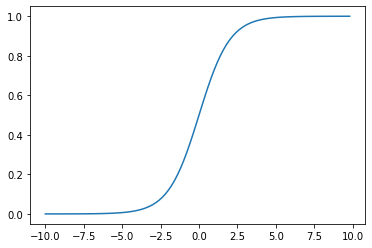

In [1]:
# Don't change anything in this cell, just run it. 
# Allow us to see plots in the notebook
%matplotlib inline 

# Libraries to read and plot images
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import statsmodels.api as sm

# define the sigmoid function 
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

# plot the sigmoid
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

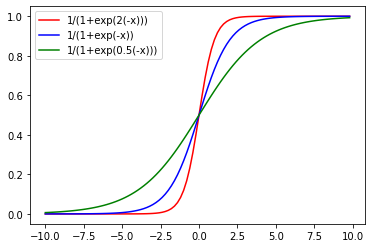

In [2]:
# Don't change anything in this cell, just run it. 
# sigmoids at different scales
sig1=sigmoid(2*x)
sig2=sigmoid(x)
sig3=sigmoid(0.5*x)

# plot the differently scaled sigmoids
plt.plot(x,sig1,'r',label='1/(1+exp(2(-x)))')
plt.plot(x,sig2,'b',label='1/(1+exp(-x))')
plt.plot(x,sig3,'g',label='1/(1+exp(0.5(-x)))')
plt.legend()
plt.show()

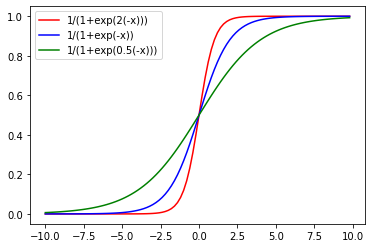

In [3]:
# Don't change anything in this cell, just run it. 
# sigmoids at different scales
sig1=sigmoid(2*x)
sig2=sigmoid(x)
sig3=sigmoid(0.5*x)

# plot the differently scaled sigmoids
plt.plot(x,sig1,'r',label='1/(1+exp(2(-x)))')
plt.plot(x,sig2,'b',label='1/(1+exp(-x))')
plt.plot(x,sig3,'g',label='1/(1+exp(0.5(-x)))')
plt.legend()
plt.show()

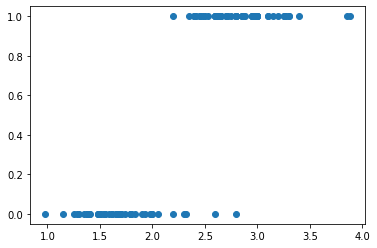

In [5]:
# Don't change anything in this cell, just run it. 
# import some real data
wine=pd.read_csv('https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/ModifiedWineData.csv')
# plot some of it
phenols=wine['TotalPhenols']
kind=wine['WineType']
plt.scatter(phenols,kind)
plt.show()

In [6]:
# Don't change anything in this cell, just run it. 
# fit a one variable logstic regression
# add a constant to the data so that our logstic function can fit a shift
phenols1=sm.add_constant(phenols,prepend=True)
# make a new instance of a logistic regression
one_var=sm.Logit(kind,phenols1)
# fit 
one_var_result=one_var.fit()

# Don't change anything in this cell, just run it. 
# look at results
one_var_result.params

Optimization terminated successfully.
         Current function value: 0.134524
         Iterations 9


const          -19.374020
TotalPhenols     8.466456
dtype: float64

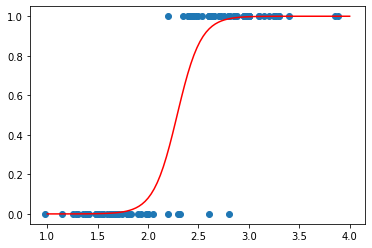

In [7]:
# Don't change anything in this cell, just run it. 
# plot results
pred_input=sm.add_constant(np.linspace(1.0,4.0, num=100), prepend=True)
predictions=one_var_result.predict(pred_input)
plt.scatter(phenols, kind)
plt.plot(np.linspace(1.0,4.0,num=100),predictions, 'r')
plt.show()

In [8]:
# score the model
# score on input TotalPhenols=1.2
one_var_result.predict([1,1.2]) # change the value 1.2 to other values 

array([9.95976022e-05])

In [9]:
# Don't change anything in this cell, just run it. 
# fit a logistic regression
# select some data
data=wine[['TotalPhenols','AlcoholContent','MalicAcid','Ash']]
# add a constant to the data so that our logstic function can fit a shift
data1=sm.add_constant(data,prepend=True)
# make a new instance of a logistic regression
logit=sm.Logit(kind,data1)
# fit 
result=logit.fit()

# Don't change anything in this cell, just run it. 
# What are the resulting parameters?
result.params

Optimization terminated successfully.
         Current function value: 0.118667
         Iterations 9


const            -12.805941
TotalPhenols       8.451100
AlcoholContent     0.212760
MalicAcid         -0.459907
Ash               -3.302841
dtype: float64

In [10]:
# score results on [constant,TotalPhenols,AlcoholContent,MalicAcid,Ash]
result.predict([1,1.2,12.2,2,2.5]) 

array([9.65008544e-05])

In [12]:
# define your objective function here
def objective(x,y,m,b):
    return sum(np.square(y-(m*x+b*np.ones(x.shape[0])))) #begining is correct value
    return sum(np.square(m*x+b*np.ones(x.shape[0])-y)) #begining is correct value
   